In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [155]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Retrieve column names from 'measurement' table

inspector = inspect(engine)
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#Retrieve column names from 'station' table
inspector = inspect(engine)
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



# Exploratory Climate Analysis

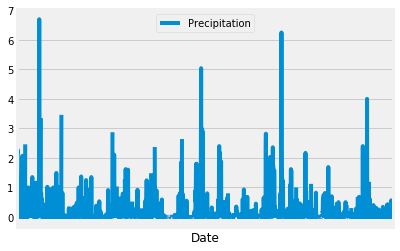

In [175]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Calculate the date 1 year ago from the last data point in the database

last_date = dt.datetime.strptime(session.query(Measurement.date).order_by(Measurement.date.desc())\
            .first()[0],"%Y-%m-%d")
query_date = last_date - dt.timedelta(days=365)


#Perform a query to retrieve the data and precipitation scores
precip_year = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date <= last_date)\
    .filter(Measurement.date >= query_date).all()
   

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_year_db = pd.DataFrame(precip_year, columns=['Date', 'Precipitation'])
precip_year_db.set_index('Date', inplace=True)
precip_year_db.head()

# Sort the dataframe by date

sorted_precip_year_db = precip_year_db.sort_values(by=['Date'])




# Use Pandas Plotting with Matplotlib to plot the data

sorted_precip_year_db.plot(kind='line')
plt.xticks([])
plt.tight_layout
plt.legend(loc=9)
plt.show()
plt.close()




In [117]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_year_db.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
stn_total = session.query(Station.station).count()
print(stn_total)

9


In [71]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import desc

session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.prcp))).all()



[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [80]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature at the most active station.

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print("Station ID: USC00519281")
print("------------------------")
print(f"Lowest Temp Recorded: {lowest_temp}")
print(f"Higest Temp Recorded: {highest_temp}")
print(f"Average Temp: {avg_temp}")


Station ID: USC00519281
------------------------
Lowest Temp Recorded: [(54.0,)]
Higest Temp Recorded: [(85.0,)]
Average Temp: [(71.66378066378067,)]


In [90]:
# Choose the station with the highest number of temperature observations.

session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.tobs))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

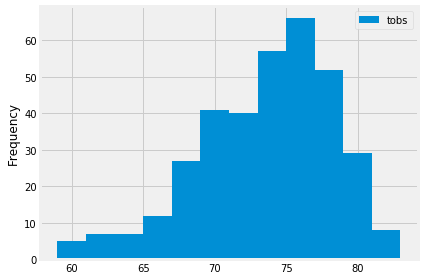

In [172]:
# Choose the station with the highest number of temperature observations.

session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.prcp))).all()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Calculate the date 1 year ago from the last data point in the database

last_date = dt.datetime.strptime(session.query(Measurement.date).order_by(Measurement.date.desc())\
            .first()[0],"%Y-%m-%d")
query_date = last_date - dt.timedelta(days=365)


#Perform a query to retrieve the data and precipitation scores
temp_year = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date <= last_date)\
    .filter(Measurement.date >= query_date)\
    .filter(Measurement.station == 'USC00519281')

#create a data frame to plot the results
temp_year_db = pd.DataFrame(temp_year, columns=['Station', 'tobs'])


hist_graph = temp_year_db['tobs'].hist(bins=12, label='tobs')
hist_graph.set_ylabel('Frequency')
hist_graph.legend(loc='best')
plt.tight_layout()
plt.show()
plt.close()


